In [ ]:
import numpy as np
from numpy import linalg as la
import sympy as sym
import pandas as pd

#Hecho por César Martínez Chico

# Math for Data Science (examen)



#### Ejercicio 1. (3 puntos)

Considera los vectores $u=(4,5,2,2)$ y $v=(2,2,0,1)$ y las matrices $M=\begin{pmatrix} 2 & 1 & 1\\ 1 & 1 & 0 \\ 3 & -1 & 2 \end{pmatrix}$ y $N=\begin{pmatrix} 4 & 3 & -1\\ 5 & 0 & 3 \\ 2 & 1 & 1 \end{pmatrix}$.

- Calcula el producto escalar entre $u$ y $v$ de dos maneras distintas.
- Determina la similitud del coseno de las matrices $M$ y $N$, considerando el producto escalar $\langle A, B\rangle := \operatorname{traza}(A^tB)$.
- ¿Cuál es la norma de $M$? ¿Y la distancia de $M$ a $N$?
- ¿Es $M$ invertible? Justifica tu respuesta y, en caso afirmativo, calcula su inversa de dos maneras distintas.
- ¿Cuál es el rango de $N$? A partir de tu respuesta, justifica (sin realizar ningún cálculo) cuántos valores singulares no nulos tiene $N$.
- Si $A\in\mathcal{M}_{m\times n}(\mathbb{R})$ tiene todos sus valores singulares estrictamente positivos, ¿cuál es el rango de $A$?

In [ ]:
u = np.array([4,5,2,2])
v = np.array([2,2,0,1])
M = np.array([[2,1,1],[1,1,0],[3,-1,2]])
N = np.array([[4,3,-1],[5,0,3],[2,1,1]])
#a)
print('producto escalar manera 1:')
productoEscalar1 = u@v.T
print(productoEscalar1)
print('producto escalar manera 2:')
productoEscalar2 = np.sum(u*v.T)
print(productoEscalar2)
#b)
simCos = np.abs((M@N.T)[0][0])/(la.norm(M)*la.norm(N))
print('similitud de cosenos: ' + str(simCos))
#c)
normaM = la.norm(M)
print('la norma de M es = '+ str(normaM))
distancia = la.norm(M-N)
print('la distanncia es = ' + str(distancia))
#d)
print('determinante de M = ' + str(la.det(M))  + 'por tanto es invertible') #como puede verse el determinante es distinto de 0, por tanto es invertible.
inver1 = np.hstack([M, np.eye(3)])
RREF,piv=sym.Matrix(inver1).rref()
print('inversa de M, manera 1 : ')
display(RREF[:,3:6])

print('inversa de M, manera 2 : ')
inver2 = la.inv(M) #inversa de M
print(inver2)

#e)
print('rango de N = ' + str(la.matrix_rank(N)))
#por tanto tendra 3 valores no nulos, porque el rango de una matriz es igual al numero de valores propios no nulos.

#f)
print('el rango de A = ' + str(la.matrix_rank(M)))

producto escalar manera 1:
20
producto escalar manera 2:
20
similitud de cosenos: 0.26243194054073893
la norma de M es = 4.69041575982343
la distanncia es = 6.6332495807108
determinante de M = -2.0000000000000004por tanto es invertible
inversa de M, manera 1 : 


Matrix([
[-1.0,  1.5,  0.5],
[ 1.0, -0.5, -0.5],
[ 2.0, -2.5, -0.5]])

inversa de M, manera 2 : 
[[-1.   1.5  0.5]
 [ 1.  -0.5 -0.5]
 [ 2.  -2.5 -0.5]]
rango de N = 3
el rango de A = 3


#### Ejercicio 2. (1.5 puntos)

- Crea una matriz $M =(m_{ij})$ dedimensión $70\times 70$ tal que $m_{ii}=0$ y $m_{ij}=1$ para $i\neq j$. 
- Comprueba que el vector $v=(1,1,...,1)$ es un vector propio de $M$. ¿Cuál es su valor propio asociado? 

In [ ]:
#a) 
print('apartado a: ')
M = np.ones([70,70]) - np.eye(70)
print(M) 
#b)
print('apartado b: ')
v = np.ones(70)
Mv = np.dot(M, v)
if np.allclose(Mv, 70*v):
  print('es vector propio')
else:
  print('no es vector propio')  
#autovalores, autovectores = la.eig(M)

apartado a: 
[[0. 1. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]
apartado b: 
no es vector propio


#### Ejercicio 3. (1.5 puntos).

El fichero `ratings_exam.csv` contiene puntuaciones de 0.5 a 5 de varios usuarios sobre varias películas. 

- Determina el número total de usuarios y de películas de dicha base de datos. 
- Realiza un algoritmo de recomendación apropiado para determinar las recomendaciones que harías para los usuarios 200,201,202,...,210.

In [ ]:
#a)
db = pd.read_csv('ratings_exam.csv')
#print(db)
print('el numero de usuarios es = ' + str(db['userId'].nunique()))
#print('el numero de peliculas es = ' + str(len(db['movieId'].unique())))
print('el numero de peliculas es = ' + str(db['movieId'].nunique()))
#cualquiera de las dos vale




el numero de usuarios es = 610
el numero de peliculas es = 9724


In [ ]:
#b)
pelis = db.pivot_table(index = 'userId', columns = 'movieId', values= 'rating').fillna(0)
matrizR = pelis.to_numpy()
print(matrizR.shape) #comprobamos que las respuestas del anterior apartado estan bien

S1=(1/la.norm(matrizR, axis=1).reshape(610,1))*matrizR
S=S1@S1.T
#print(S)

K=S@matrizR
R=np.argsort(K, axis=1)
#print(R)

peliculas=db.movieId.to_numpy()

def Recomendacion(i): #metodo que calcula la recomendacion para i
    return R[i-1][matrizR[i-1,R[i-1,:]]==0][-1]

for i in range(199,210):
    print("Al usuario", i+1, "le recomendamos la película", np.unique(peliculas)[Recomendacion(i+1)], "\n")

(610, 9724)
Al usuario 200 le recomendamos la película 593 

Al usuario 201 le recomendamos la película 318 

Al usuario 202 le recomendamos la película 527 

Al usuario 203 le recomendamos la película 356 

Al usuario 204 le recomendamos la película 318 

Al usuario 205 le recomendamos la película 318 

Al usuario 206 le recomendamos la película 296 

Al usuario 207 le recomendamos la película 296 

Al usuario 208 le recomendamos la película 356 

Al usuario 209 le recomendamos la película 296 

Al usuario 210 le recomendamos la película 318 



#### Ejercicio 4. (2 puntos)

Considera la función $f(x,y)=e^{x^2+xy}$. 

- Calcula el vector gradiente $\nabla f (x,y)$.
- Halla la derivada $\left.\dfrac{\partial^3 f}{\partial y\partial x\partial y}\right\rvert_{(1,0)}$.
- Determina la matriz hessiana de $f$ en el punto $(1,0)$.
- Considera la función $g(y):=y\cdot f(1,y)=y\cdot e^{1+y}$. Realiza un gráfico de dicha función y observa que posee un mínimo global. Aplica el método de Newton para calcular dicho mínimo con una tolerancia de $10^{-6}$, considerando un número máximo de $15$ iteraciones y el punto semilla $x_0=4$. 
- Vuelve a dibujar la función $g(y)$ pero marcando el mínimo hallado en la función, con un punto en color rojo.

el gradiente es =


Matrix([[(2*x + y)*exp(x**2 + x*y), x*exp(x**2 + x*y)]])

La derivada sucesiva de f: yxy es = 


x**2*(2*x + y)*exp(x**2 + x*y) + 2*x*exp(x**2 + x*y)

resultado de sustituir =


4*E

La hessiana de f en el punto (1,0) es =


Matrix([
[6*E, 3*E],
[3*E,   E]])

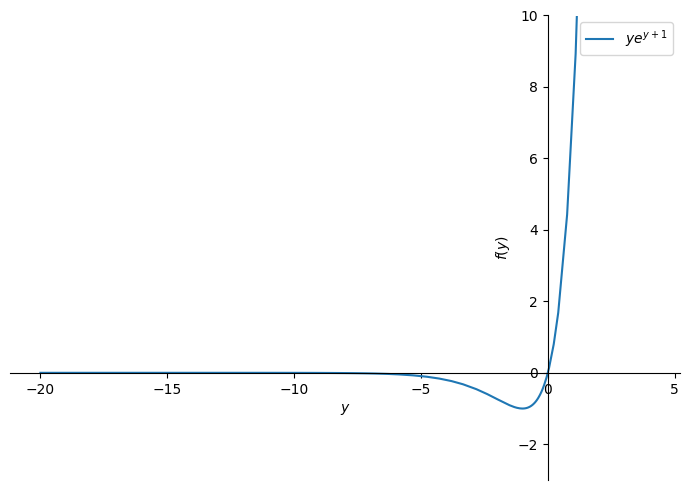

El resultado de aplicar el algoritmo de Newton con esas caracteristicas es = 4.57065756049565e-22


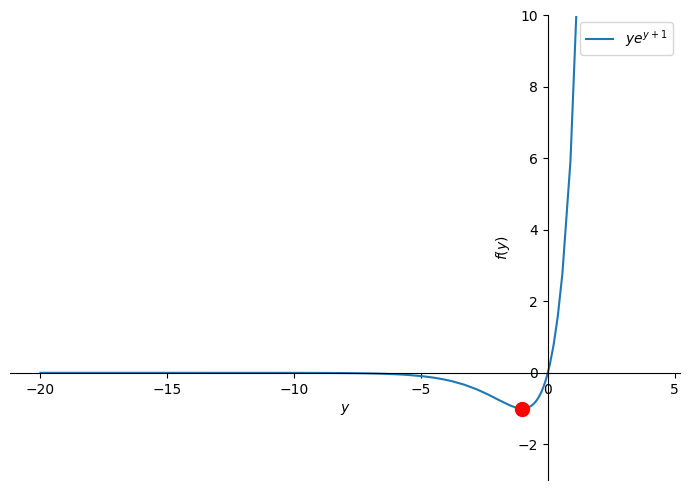

In [ ]:
x,y = sym.symbols('x y')
f = sym.exp((x**2) + (x*y))
#a)
gradiente = sym.Matrix([f]).jacobian([x,y])
print('el gradiente es =' )
display(gradiente)
#b)
print('La derivada sucesiva de f: yxy es = ')
b = f.diff(y)
b = b.diff(x)
b = b.diff(y)
display(b)
res = b.subs(zip([x,y],[1,0]))
print('resultado de sustituir =')
display(res)
#c)
H = sym.hessian(f, [x, y])
print('La hessiana de f en el punto (1,0) es =')
display(H.subs(zip([x, y], [1,0])))

#d)
g = y*sym.exp(1+y)
sym.plot(g, (y,-20,4), ylim=(-3,10), legend = True, size=(7,5)) #para ver el minimo a mano.

def Newton(f,variable,pto_semilla,iter_max,tolerancia):
    df=f.diff(variable)
    xn=pto_semilla
    xn1=xn+0.1
    n=0
    
    while (np.abs(xn1-xn)>tolerancia and n<iter_max):
        xn=xn1
        xn1=xn1-f.subs(variable,xn1)/df.subs(variable,xn1)
        n=n+1

    return xn1

d = Newton(g,y,4,15,10**-6)
print('El resultado de aplicar el algoritmo de Newton con esas caracteristicas es = ' + str(d))

#e)
minimo = Newton(g.diff(y),y,4,15,10**-6)
sym.plot(g, (y,-20,4), markers=[{'args': [minimo, g.subs(y,minimo)], 'color': "red", 'marker': "o", 'ms':10}], ylim=(-3,10), legend = True, size=(7,5))

#### Ejercicio 5. (2 puntos).

En un país se celebran elecciones cada cuatro años y los resultados de cada elección dependen únicamente de la elección anterior. Los partidos que sepresentan son: el Demócrata (D), el Liberal (L) y el Conservador (C). 

El 70\% de los votantes de D votarán de nuevo a D, el 10\% de los votantes de D votarán L y el 20\% votarán a C. Por otro lado, el 80\% de los votantes de L seguirán votando L, el 5\% pasarán a votar a D y el 15\% votarán a C. Finalmente, el 70\% de los votantes de C votarán de nuevo a C y el 30\% votarán a L (por lo que ningún votante de C pasará a votar a D).

- Modeliza los resultados de las elecciones de un año a otro mediante un sistema de ecuaciones apropiado, donde las variables son D, L y C. 
- Construye la matriz $P$ que determina el movimiento de votos de unas elecciones a las siguientes. Comprueba que sus columnas suman $1$.
- Si los porcentajes de votos en una elección son 55\% para D, 40\% para L y 5\% para C, determina el resultado que se dará 8 años después.
- ¿Qué porcentaje de votos tiene que obtener cada uno de los partidos en unas elecciones para que en las elecciones siguientes se obtenga exactamente el mismo resultado?

In [ ]:
#no se como hacerlo y como me queda poco tiempo pues confiemos en pasar con todo lo demas jeje